In [2]:
#loading Dataset
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#EDA
from collections import Counter

#data preprocessing
from sklearn.preprocessing import StandardScaler
#data Splitting
from sklearn.model_selection import train_test_split

#data modelling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#CombineallEnsembling
from mlxtend.classifier import StackingCVClassifier

In [3]:
data1 = pd.read_csv("diabetes.csv")

In [4]:
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data1.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
y1 = data1['Outcome']
x1 = data1.drop('Outcome', axis=1)

# First split: Split data into main set and test set
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size=0.20, random_state=0)

# Second split: Split main set into training set and validation set
#X_train, X_validation, Y_train, Y_validation = train_test_split(X_main, Y_main, test_size=0.2, stratify=Y_main, random_state=42)

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [12]:
X_train1

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

In [13]:
Y_train1

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [14]:
print(Y_test1.unique())
Counter(Y_train1) #imported

[1 0]


Counter({0: 393, 1: 221})

In [16]:
#Logistic Regression Model
m0 = 'Logistic Regression'
lr1 = LogisticRegression()
model1 = lr1.fit(X_train1, Y_train1)
lr_predict1 = lr1.predict(X_test1)
lr_conf_matrix1 = confusion_matrix(Y_test1, lr_predict1)
lr_acc_score1 = accuracy_score(Y_test1, lr_predict1)
print("Confusion Matrix")
print(lr_conf_matrix1)
print("\n")
print("Accuracy of Logistic Regression on Test Set", lr_acc_score1*100, '\n')
print("Classification Report (Test Set):")
print(classification_report(Y_test1, lr_predict1))


Confusion Matrix
[[98  9]
 [18 29]]


Accuracy of Logistic Regression on Test Set 82.46753246753246 

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [18]:
#Random Forest Model
m1 = 'Random Forest Classifier'
rf1 = RandomForestClassifier(n_estimators=20, random_state=2, max_depth=5)
rf1.fit(X_train1, Y_train1)
rf_predicted1 = rf1.predict(X_test1)
rf_conf_matrix1 = confusion_matrix(Y_test1, rf_predicted1)
rf_acc_score1 = accuracy_score(Y_test1, rf_predicted1)
print("Confusion Matrix")
print(rf_conf_matrix1)
print("\n")
print("Accuracy of Random Forest", rf_acc_score1*100, '\n')
print(classification_report(Y_test1, rf_predicted1))

Confusion Matrix
[[95 12]
 [19 28]]


Accuracy of Random Forest 79.87012987012987 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



In [19]:
#Decision tree Model
m2 = 'Decision Tree'
dt1 = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=6)
dt1.fit(X_train1, Y_train1)
dt_predicted1 = dt1.predict(X_test1)
dt_conf_matrix1 = confusion_matrix(Y_test1, dt_predicted1)
dt_acc_score1 = accuracy_score(Y_test1, dt_predicted1)
print("Confusion Matrix")
print(dt_conf_matrix1)
print("\n")
print("Accuracy of Decision Tree", dt_acc_score1*100, '\n')
print(classification_report(Y_test1, dt_predicted1))

Confusion Matrix
[[93 14]
 [27 20]]


Accuracy of Decision Tree 73.37662337662337 

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154



In [20]:
m3 = 'Support Vector Classifier'
svc1 = SVC(kernel='rbf', C=2)
svc1.fit(X_train1, Y_train1)
svc_predicted1 = svc1.predict(X_test1)
svc_conf_matrix1 = confusion_matrix(Y_test1, svc_predicted1)
svc_acc_score1 = accuracy_score(Y_test1, svc_predicted1)
print("Confusion Matrix")
print(svc_conf_matrix1)
print("\n")
print("Accuracy of Support Vector Classifier ", svc_acc_score1*100, '\n')
print(classification_report(Y_test1, svc_predicted1))

Confusion Matrix
[[95 12]
 [21 26]]


Accuracy of Support Vector Classifier  78.57142857142857 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



In [21]:

data1.select_dtypes(include="number").columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

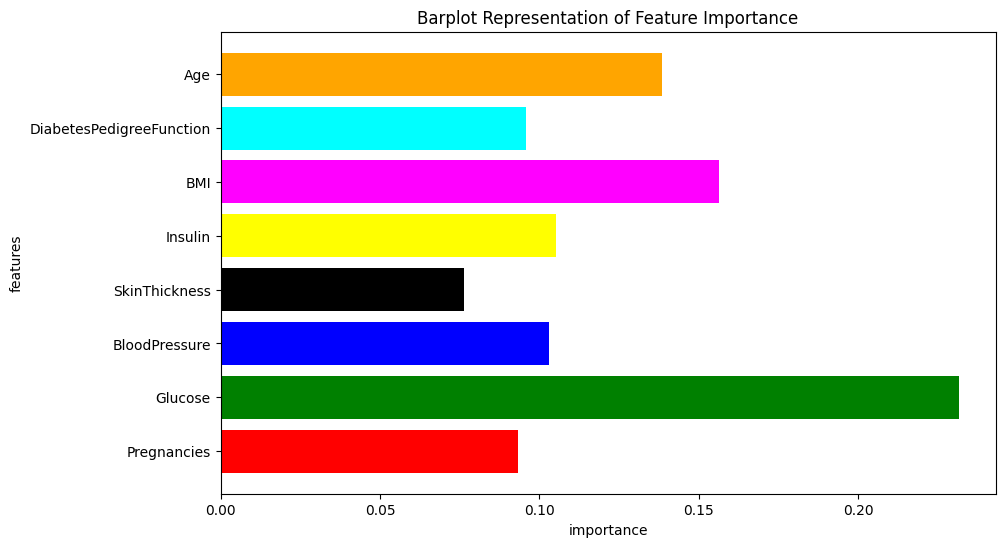

In [22]:
xgb = XGBClassifier()
xgb.fit(X_train1, Y_train1)


colors = ['red', 'green', 'blue', 'black', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'lime', 'grey']

imp_feature = pd.DataFrame({'Feature': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], 
                            'Importance': xgb.feature_importances_})
plt.figure(figsize=(10, 6))
plt.title("Barplot Representation of Feature Importance")
plt.xlabel("importance")
plt.ylabel("features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

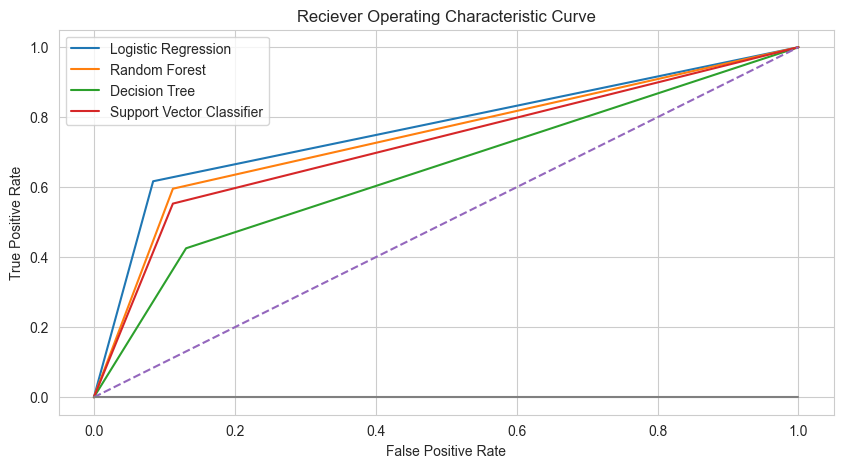

In [23]:
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(Y_test1, lr_predict1)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(Y_test1, rf_predicted1)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(Y_test1, dt_predicted1)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(Y_test1, svc_predicted1)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciever Operating Characteristic Curve')
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')

plt.plot([0,1], ls='--')
plt.plot([0,0], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [24]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support vector Classifiers'], 
                            'Accuracy':[lr_acc_score1*100, rf_acc_score1*100, dt_acc_score1*100, svc_acc_score1*100]})

model_ev

,Model,Accuracy
0,Logistic Regression,82.467532
1,Random Forest,79.870130
2,Decision Tree,73.376623
3,Support vector Classifiers,78.571429


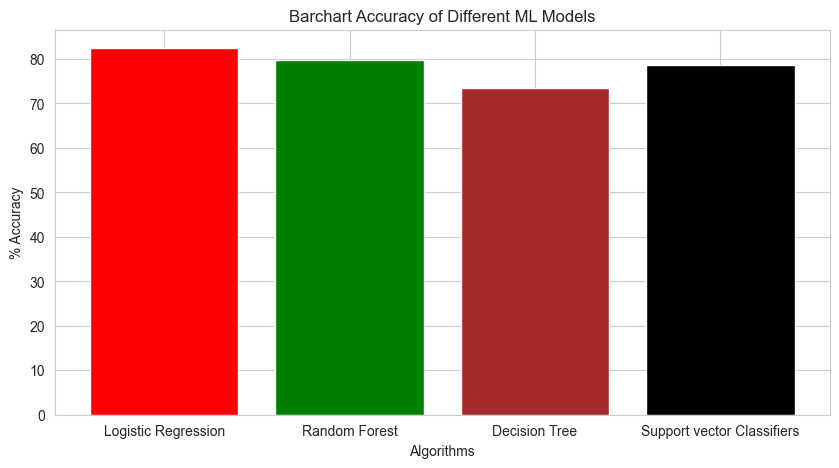

In [25]:
colors = ['red', 'green', 'brown', 'black', 'orange']
plt.figure(figsize=(10,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)
plt.show()

In [26]:
lr_predict1

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [27]:
Category1=['No You Dont Have Diabetes', 'Yes, You Have Diabetes..please Get All Tests Done']

In [28]:
custom_data_input1 = np.array([[10,101,76,48,180,32.9,0.171,3]])

In [29]:
std_data1 = scaler.transform(custom_data_input1)
std_data1

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.78021128, -0.62597168,  0.34674316,  1.70680537,  0.83361703,
         0.08767546, -0.8874812 , -2.54818404]])

In [36]:
custom_data_pred1

array([0])

In [37]:
 custom_data_pred1 = lr1.predict(std_data1)

In [38]:
print(Category1[int(custom_data_pred1)])

No You Dont Have Diabetes


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_5576\3817369302.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(Category1[int(custom_data_pred1)])


In [39]:
#Saving Trained Model

In [ ]:
import pickle

filename = 'diabetes_trained_model.sav'
pickle.dump(lr1, open(filename, 'wb'))

#loading Saved Model
loaded_model = pickle.load(open('diabetes_trained_model.sav', 'rb'))

In [49]:
#testing loaded model
Category=['No You Dont Have Diabetes', 'Yes, You Have Diabetes..please Get All Tests Done']

custom_data_input = np.array([[8,183,64,0,0,23.3,0.672,32]])

std_data = scaler.transform(custom_data_input)

custom_data_pred = loaded_model.predict(std_data)

print(Category1[int(custom_data_pred)])

Yes, You Have Diabetes..please Get All Tests Done


C:\Users\Prathamesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_5576\3991407047.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(Category1[int(custom_data_pred)])
